# The Damped, Driven Pendulum

Solution to Problem Set 4, Problem 3 <br>
~ Arsh R. Nadkarni

To run: <br>
**jupyter notebook DDP_4_3.ipynb**

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams; rcParams["figure.dpi"] = 300
from matplotlib.ticker import (AutoMinorLocator)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

Consider the second-order differential equation describing the Damped-Driven Pendulum - 

$$ \frac{d^2 \theta}{dt^2} = -sin(\theta) -\frac{1}{Q}\frac{d \theta}{dt} -A cos(\omega_Dt) $$

We turn this into a pair of first-order ODEs by defining $\omega = d\theta/dt$ and writing the system as

\begin{align}
\begin{split}
\frac{d\omega}{dt} &= -sin(\theta) -\frac{\omega}{Q} -Acos(\omega_Dt) \\
\frac{d\theta}{dt} &= \omega
\end{split}
\end{align}

### Function to describe RHS for the System of ODEs

In [32]:
def damped_pendulum_RHS(t,y,*P):
    """ Return the right hand side of the 
    ordinary differential equation describing
    a damped-driven pendulum.
    We store our function as the array y=[theta,omega]
    """
    #unpack parameters
    Q,A,omega_d = P
    return np.array([y[1], -np.sin(y[0])- y[1]/Q - A*np.cos(omega_d*t)])

### Functions to define the RK4 Step and the ODE Solver

In [33]:
def RK4_step(t, y, h, g, *P):
    """
    Implements a single step of a fourth-order, explicit Runge-Kutta scheme
    """
    thalf = t + 0.5*h
    k1 = h * g(t, y, *P)
    k2 = h * g(thalf, y + 0.5*k1, *P)
    k3 = h * g(thalf, y + 0.5*k2, *P)
    k4 = h * g(t + h, y + k3, *P)
    return y + (k1 + 2*k2 + 2*k3 + k4)/6
def odeSolve(t0, y0, tmax, h, RHS, method, *P):
    """
    ODE driver with constant step-size, allowing systems of ODE's
    """
    # make array of times and find length of array
    t = np.arange(t0,tmax+h,h)
    ntimes,  = t.shape

    # find out if we are solving a scalar ODE or a system of ODEs, and allocate space accordingly
    
    if type(y0) in [int, float]:  # check if primitive type -- means only one eqn
        neqn = 1
        y = np.zeros( ntimes )
    else:                         # otherwise assume a numpy array -- a system of more than one eqn
        neqn, = y0.shape
        y = np.zeros( (ntimes, neqn) )

    # set first element of solution to initial conditions (possibly a vector) 
    y[0] = y0

    # march on...
    for i in range(0,ntimes-1):
        y[i+1] = method(t[i], y[i], h, RHS, *P)

    return t,y

### Questions from Problem Set

* Adapt the code developed in Lecture 14 to simulate the damped, driven pendulum and produce a phase-plot of the angular velocity $\omega$ vs. the pendulum angle $\theta$ for initial conditions $\theta_0$ = 0, $\omega_0$ = 1, and parameter values A = 1.5, and Q = 1.2 (assume $\omega_D$ = 2/3).

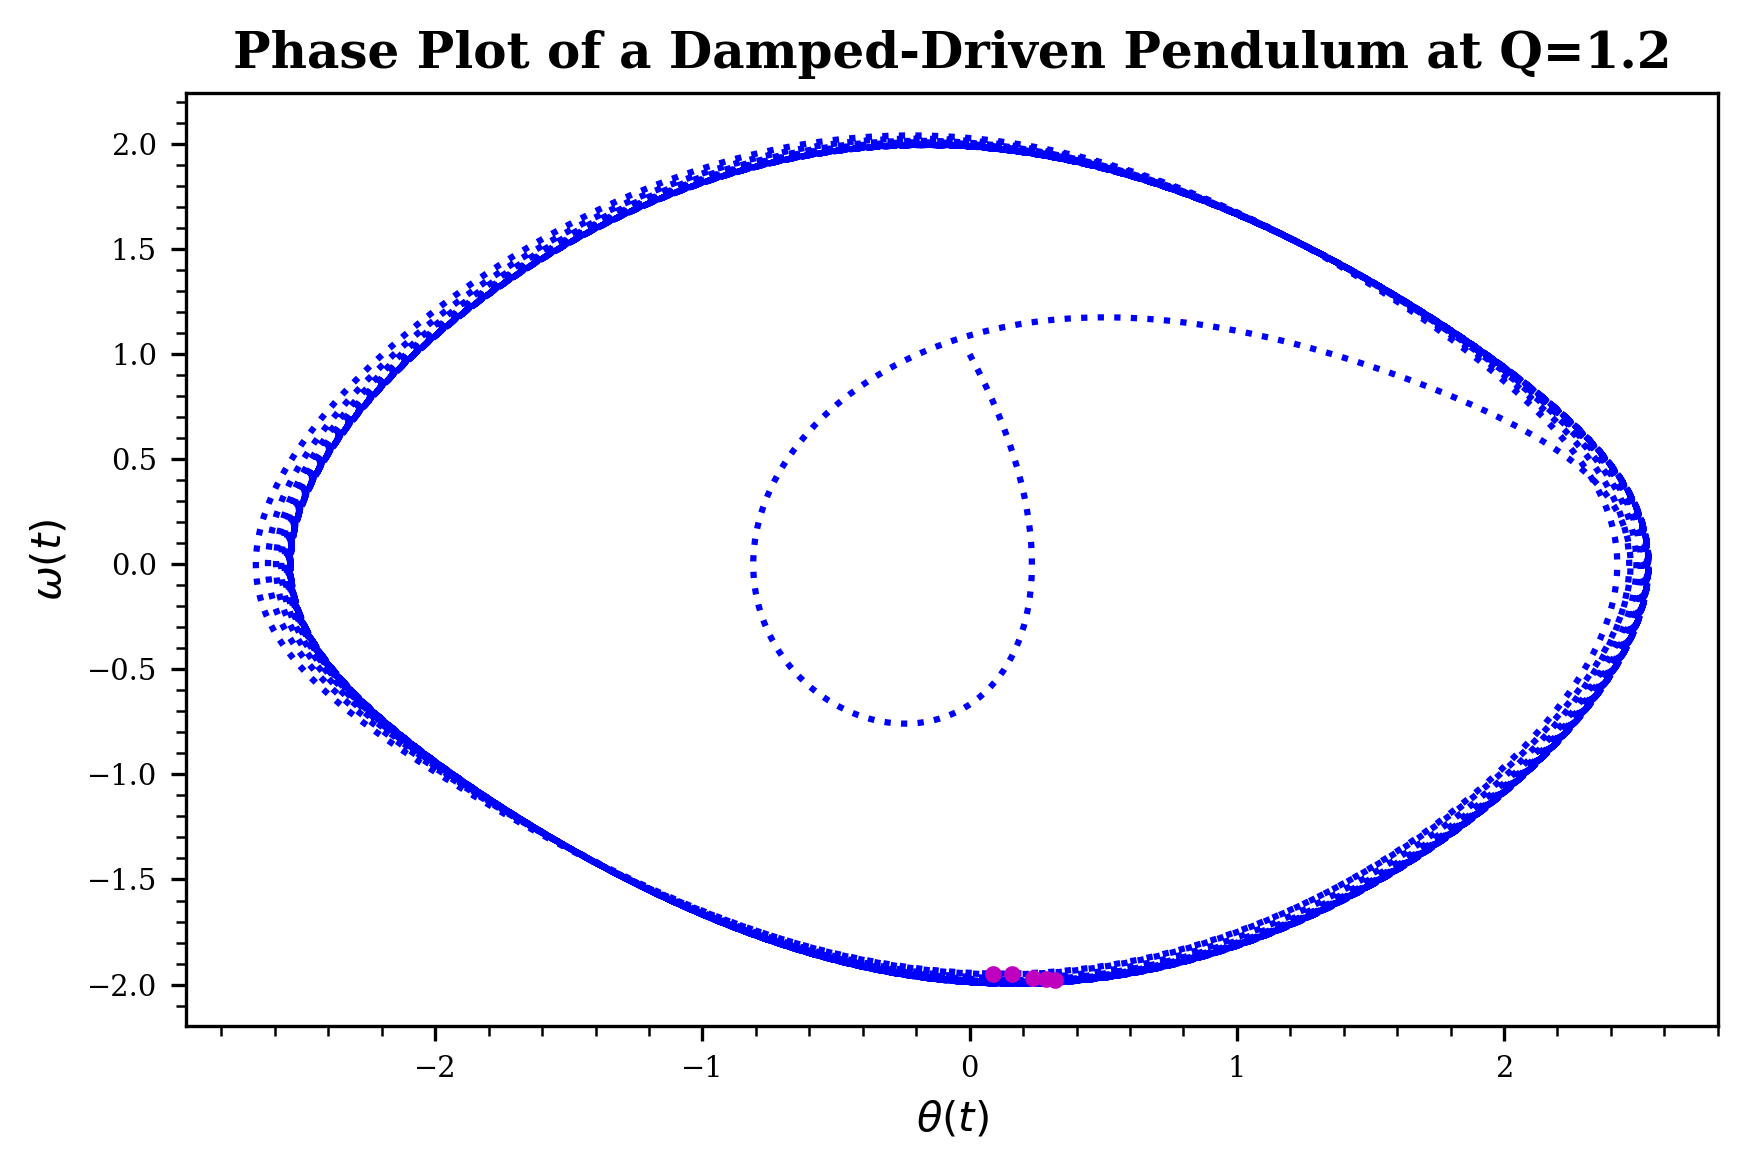

In [92]:
# initial conditions
theta0 = 0
omega0 = 1
t0 = 0
tmax = 50*np.pi
N = int(tmax/h) + 1
#choose a time step
h = (np.pi)/100
# parameters
Q = 1.2
A = 1.5
omega_d = (2/3)

#solve the ODE
t,y_damped = odeSolve(t0,np.array([theta0,omega0]),tmax,h,damped_pendulum_RHS,RK4_step,Q,A,omega_d)

# plot
f,a = plt.subplots()
a.plot(y_damped[:,0],y_damped[:,1],'b:')
# to plot a point every period
for i in range(N):
    if i!= 0:
        if i%300 == 0:
            a.plot(y_damped[i,0], y_damped[i,1],'m.')
a.set_ylabel(r"$\omega(t)$")
a.set_xlabel(r"$\theta(t)$")
a.set_title("Phase Plot of a Damped-Driven Pendulum at Q=1.2", fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

Now, we use a driving frequency of $\omega_D$ = 2/3, a driving amplitude A = 1.5, and vary the quality factor Q.

* Plot the angle of the pendulum and its angular velocity against time for a value of Q which leads to a simple, period-1 trajectory.

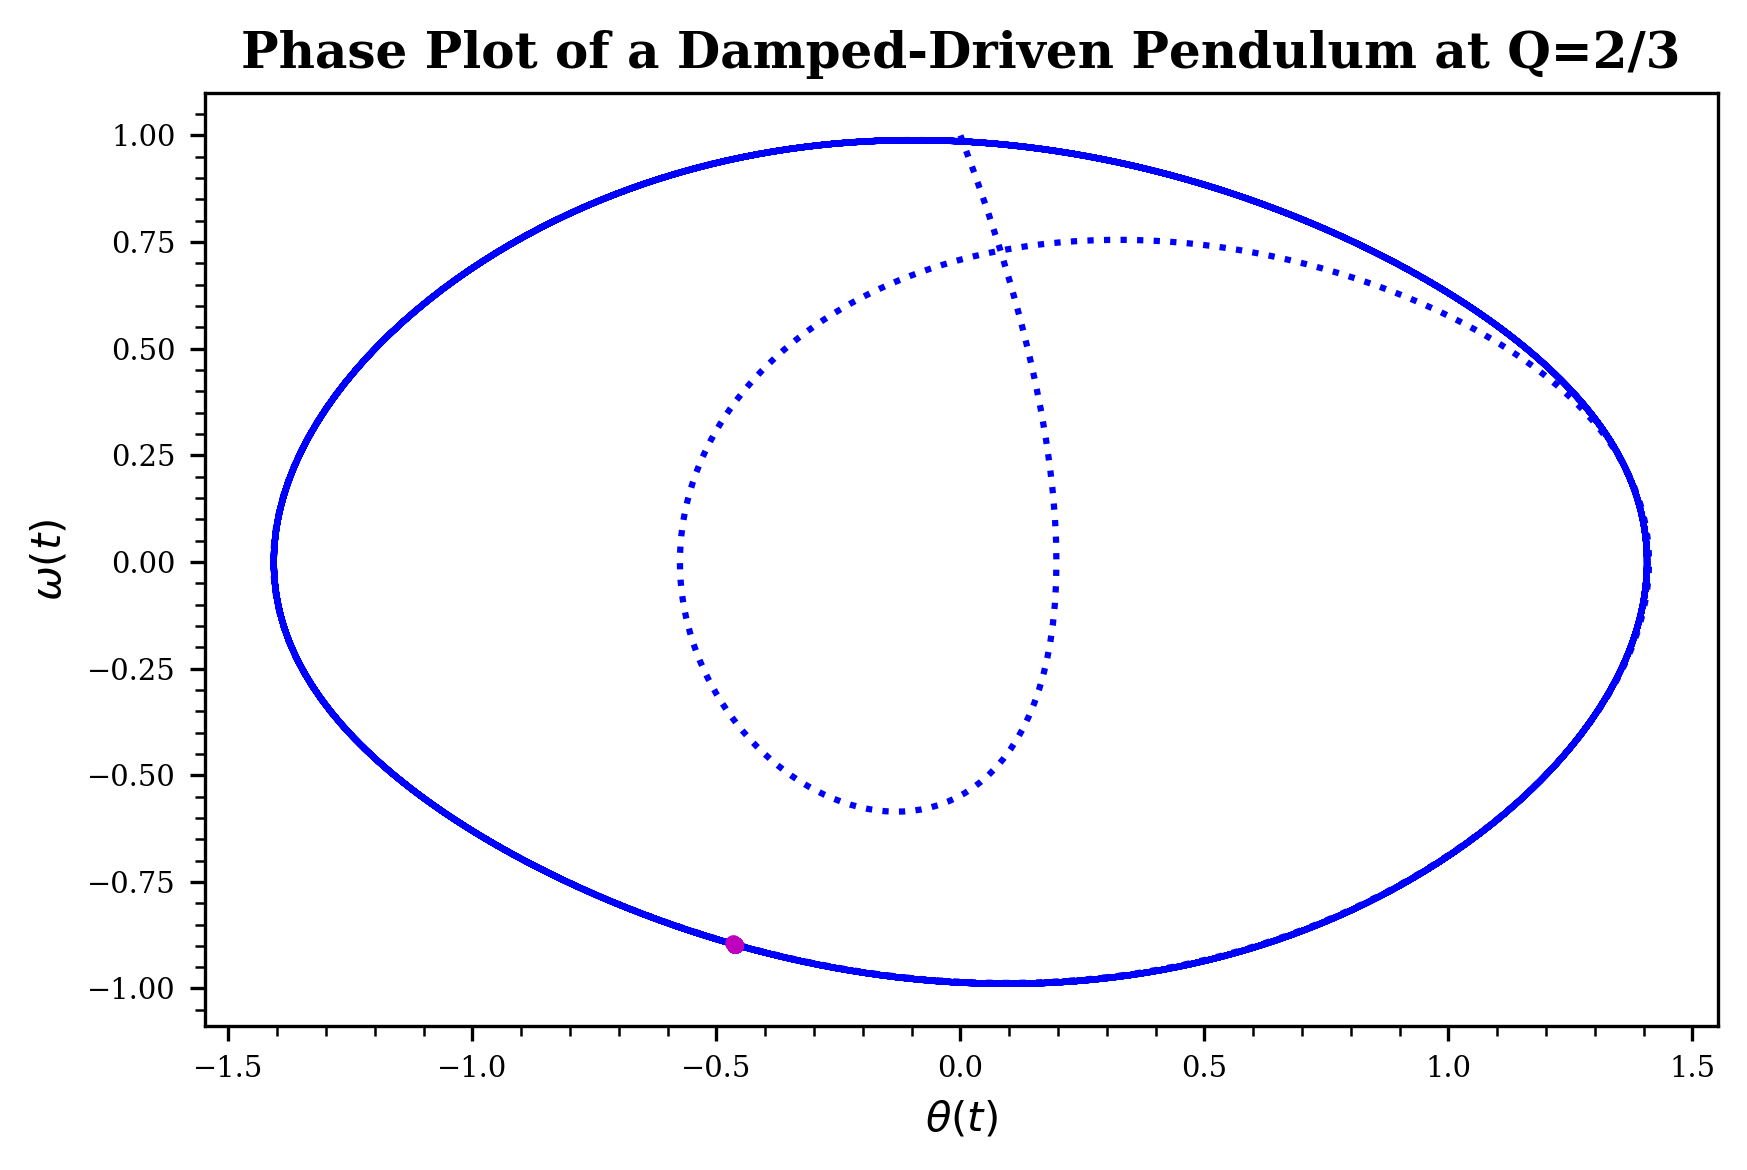

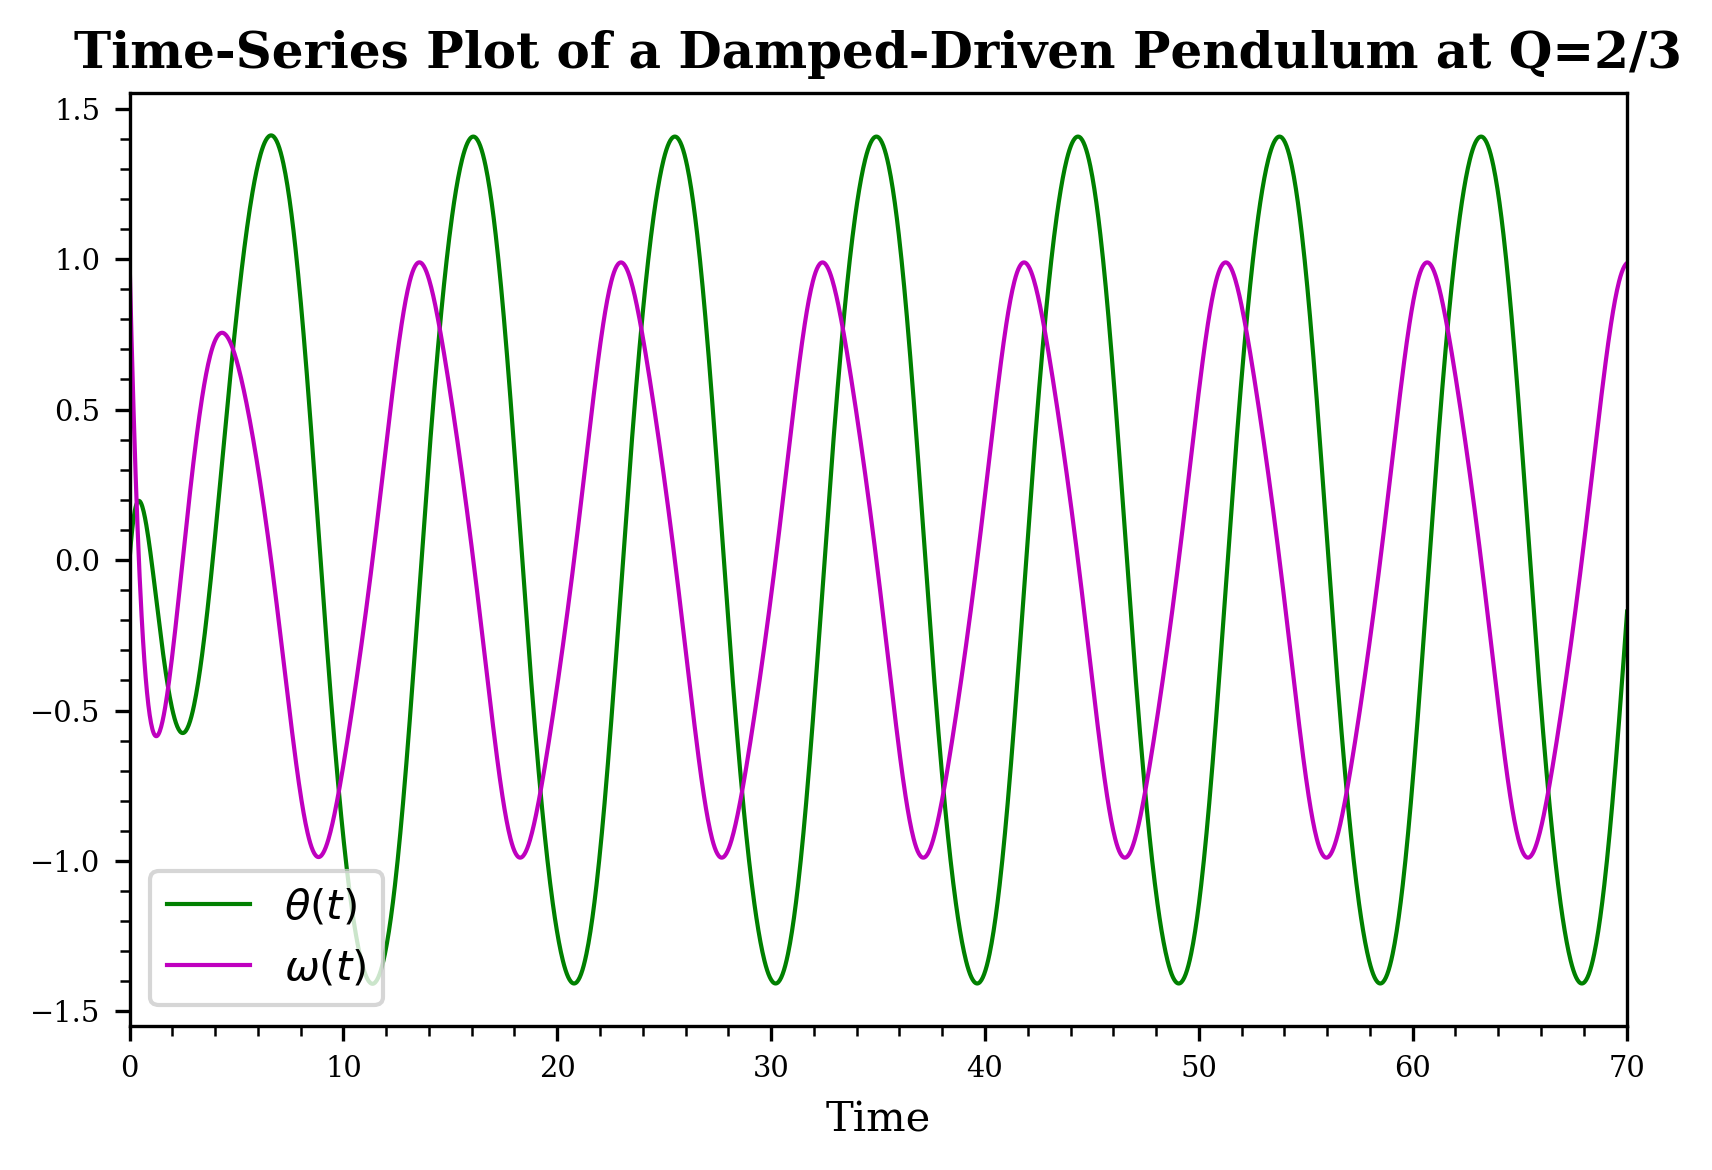

In [80]:
# initial conditions
theta0 = 0
omega0 = 1
t0 = 0
tmax = 50*np.pi
N = int(tmax/h) + 1
#choose a time step
h = (np.pi)/100
# parameters
Q = 2/3 # varied the value of Q until all points were stacked on top of each other
A = 1.5
omega_d = (2/3)

# solve the ODE
t1,y1_damped = odeSolve(t0,np.array([theta0,omega0]),tmax,h,damped_pendulum_RHS,RK4_step,Q,A,omega_d)

# phase plot
f,a = plt.subplots()
a.plot(y1_damped[:,0],y1_damped[:,1],'b:')
# to plot a point every period
for i in range(N):
    if i!= 0:
        if i%300 == 0:
            a.plot(y1_damped[i,0], y1_damped[i,1],'m.')
a.set_ylabel(r"$\omega(t)$")
a.set_xlabel(r"$\theta(t)$")
a.set_title("Phase Plot of a Damped-Driven Pendulum at Q=2/3", fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

# time series plot
f,a = plt.subplots()
a.plot(t1, y1_damped[:, 0],'g', lw = 1, label=r"$\theta(t)$")
a.plot(t1, y1_damped[:, 1],'m', lw = 1, label=r"$\omega(t)$")
a.set_xlim(0, 70)
a.legend()
a.set_xlabel("Time")
a.set_title("Time-Series Plot of a Damped-Driven Pendulum at Q=2/3", fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

* Plot the phase diagram of this orbit with the Poincare section superposed (i.e., use small dots for the trajectory and plot a larger dot of a different color once per drive period $2\pi/\omega_D$). Integrate the system for a long enough time before plotting so that the initial conditions are not seen in the phase plot

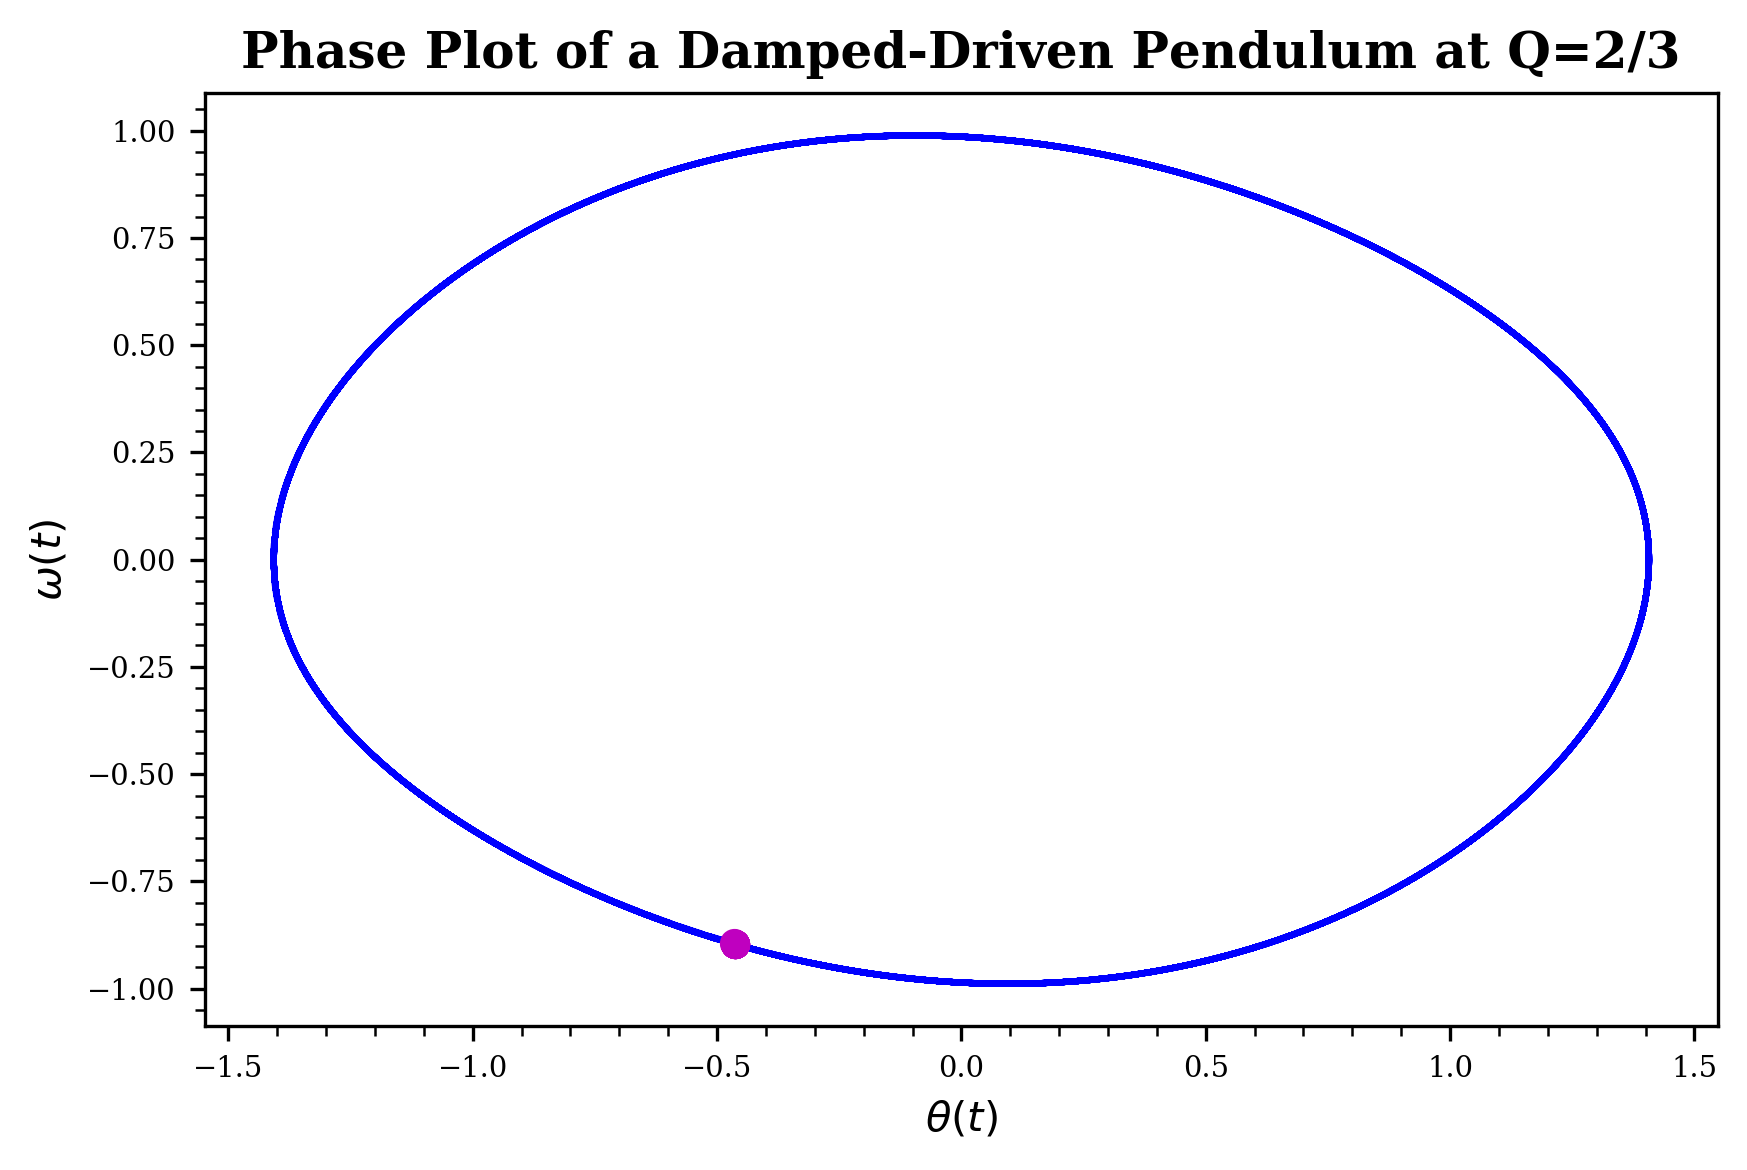

In [77]:
# initial conditions
theta0 = 0
omega0 = 1
t0 = 0
tmax = 50*np.pi
N = int(tmax/h) + 1
#choose a time step
h = (np.pi)/100
# parameters
Q = 2/3 # varied the value of Q until all points were stacked on top of each other
A = 1.5
omega_d = (2/3)

# solve the ODE
t2,y2_damped = odeSolve(t0,np.array([theta0,omega0]),tmax,h,damped_pendulum_RHS,RK4_step,Q,A,omega_d)

# phase plot
f,a = plt.subplots()
a.plot(y2_damped[300:,0],y2_damped[300:,1],'b--')
# to plot a point every period
for i in range(N):
    if i!= 0:
        if i%300 == 0:
            a.plot(y2_damped[i,0], y2_damped[i,1],'mo')
a.set_ylabel(r"$\omega(t)$")
a.set_xlabel(r"$\theta(t)$")
a.set_title("Phase Plot of a Damped-Driven Pendulum at Q=2/3", fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

* Repeat the same plot for a value of Q where spatial symmetry-breaking takes place, but the trajectory is still period-1.

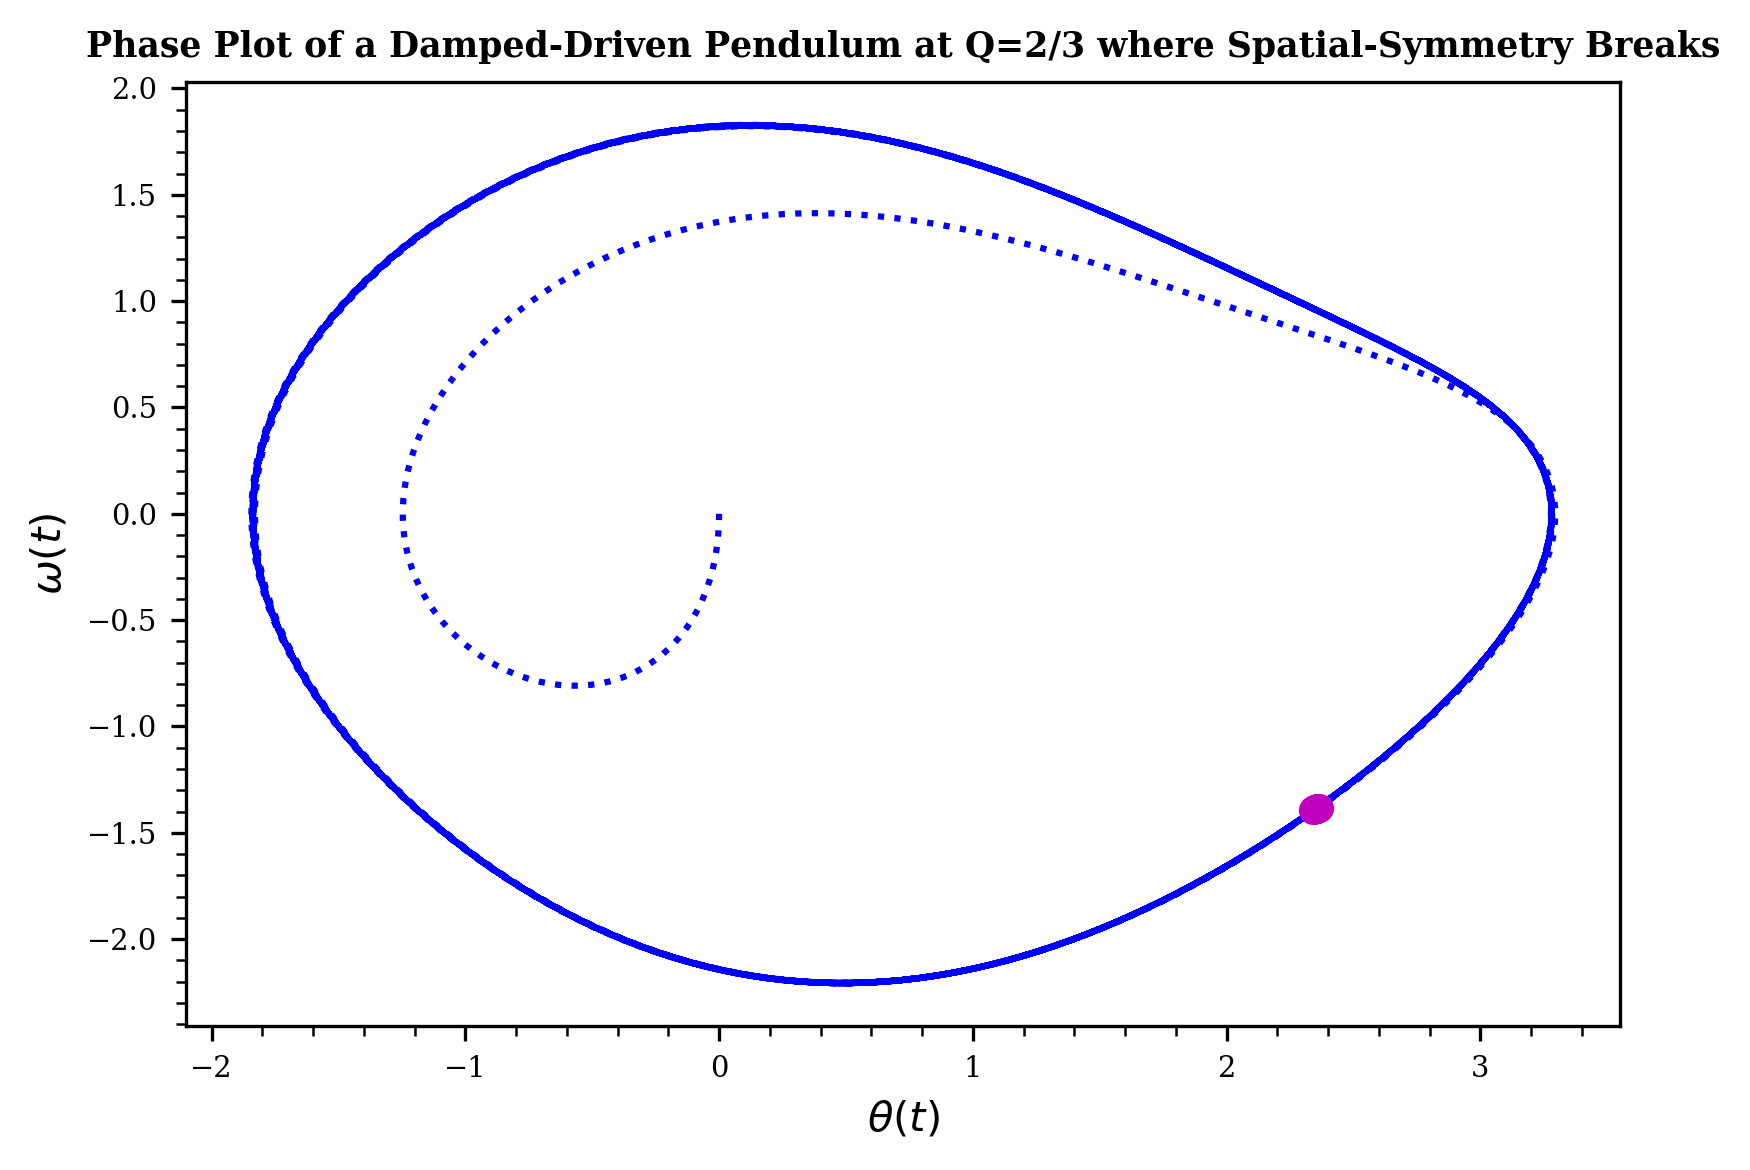

In [82]:
# changed the initial condition to (0,0) and doubled Q to find where spatial-symmetry breaks

# initial conditions
theta0 = 0
omega0 = 0
t0 = 0
tmax = 50*np.pi
N = int(tmax/h) + 1
#choose a time step
h = (np.pi)/100
# parameters
Q = 4/3 # varied the value of Q until all points were stacked on top of each other
A = 1.5
omega_d = (2/3)

# solve the ODE
t3,y3_damped = odeSolve(t0,np.array([theta0,omega0]),tmax,h,damped_pendulum_RHS,RK4_step,Q,A,omega_d)

# phase plot
f,a = plt.subplots()
a.plot(y3_damped[:,0],y3_damped[:,1],'b:')
# to plot a point every period
for i in range(N):
    if i!= 0:
        if i%300 == 0:
            a.plot(y3_damped[i,0], y3_damped[i,1],'mo')
a.set_ylabel(r"$\omega(t)$")
a.set_xlabel(r"$\theta(t)$")
a.set_title("Phase Plot of a Damped-Driven Pendulum at Q=2/3 where Spatial-Symmetry Breaks", fontsize='small', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

* Increase Q to a value where the period of the pendulum has doubled, and plot both the time series and the phase plot/Poincare section.

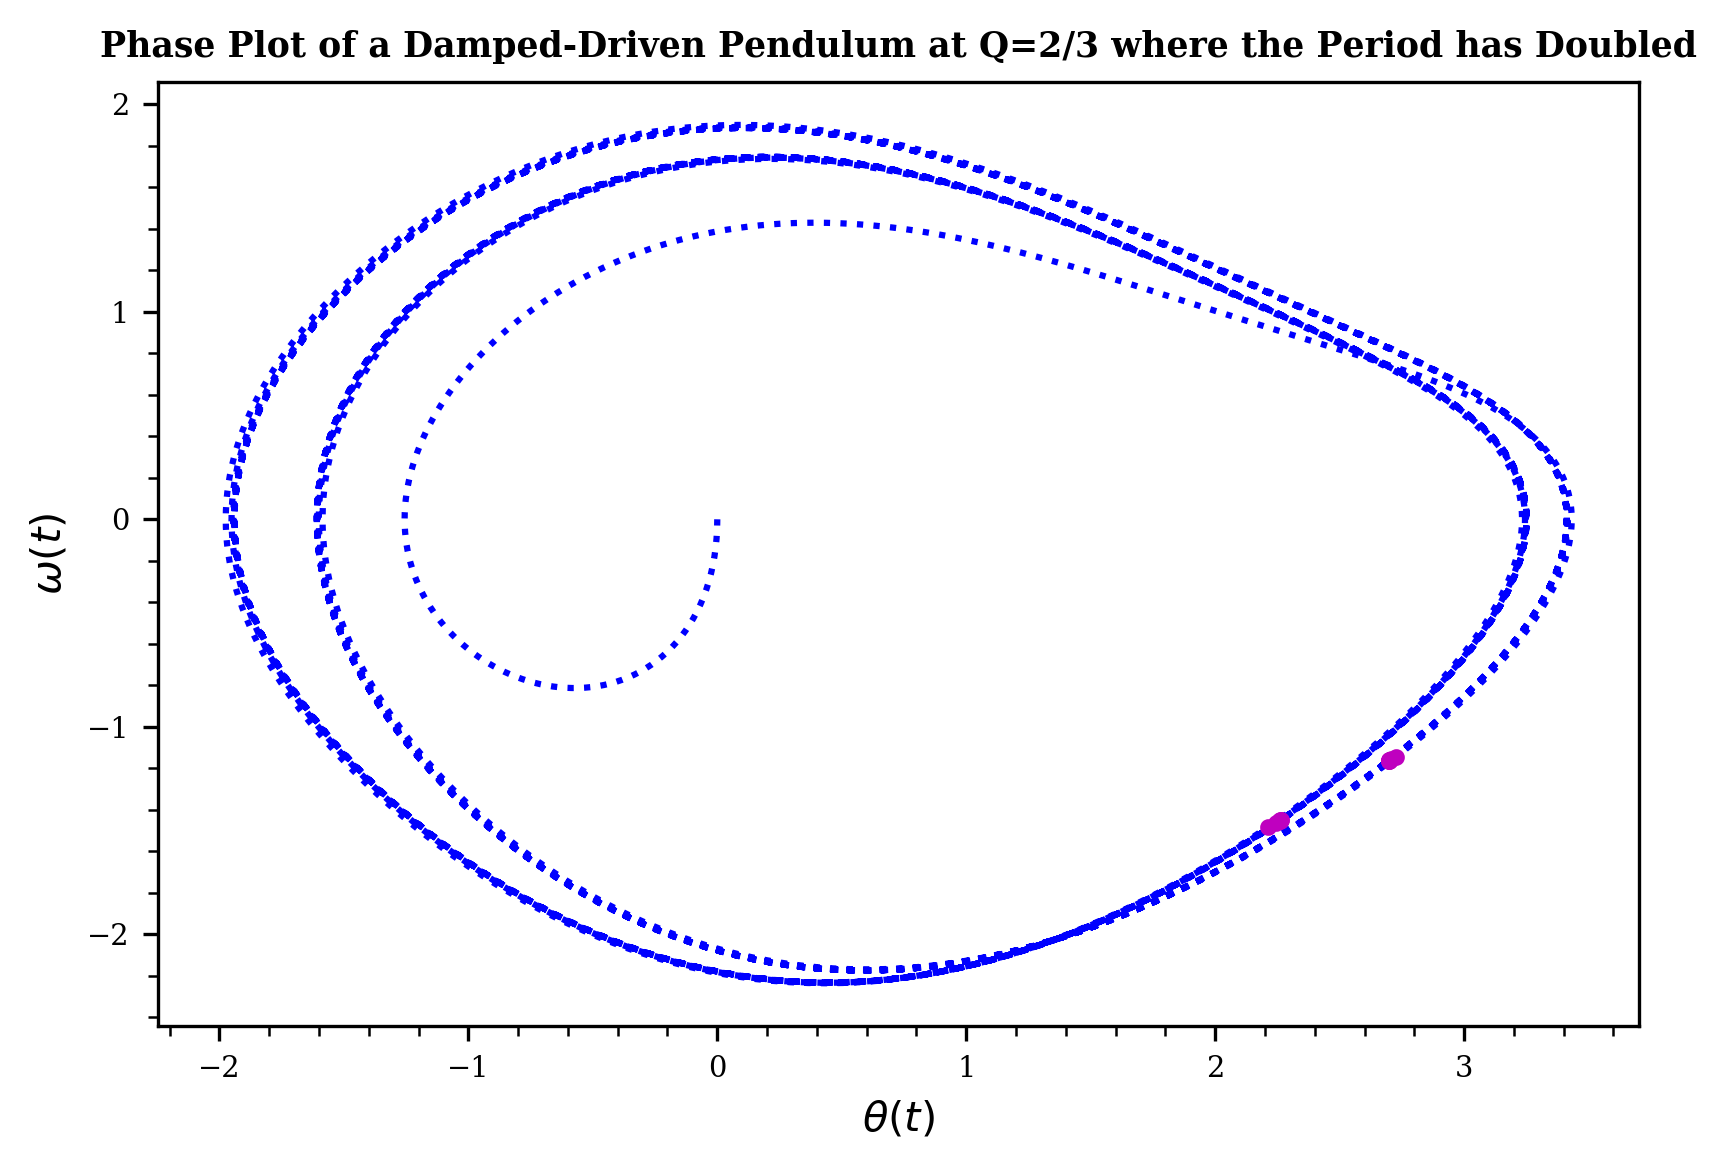

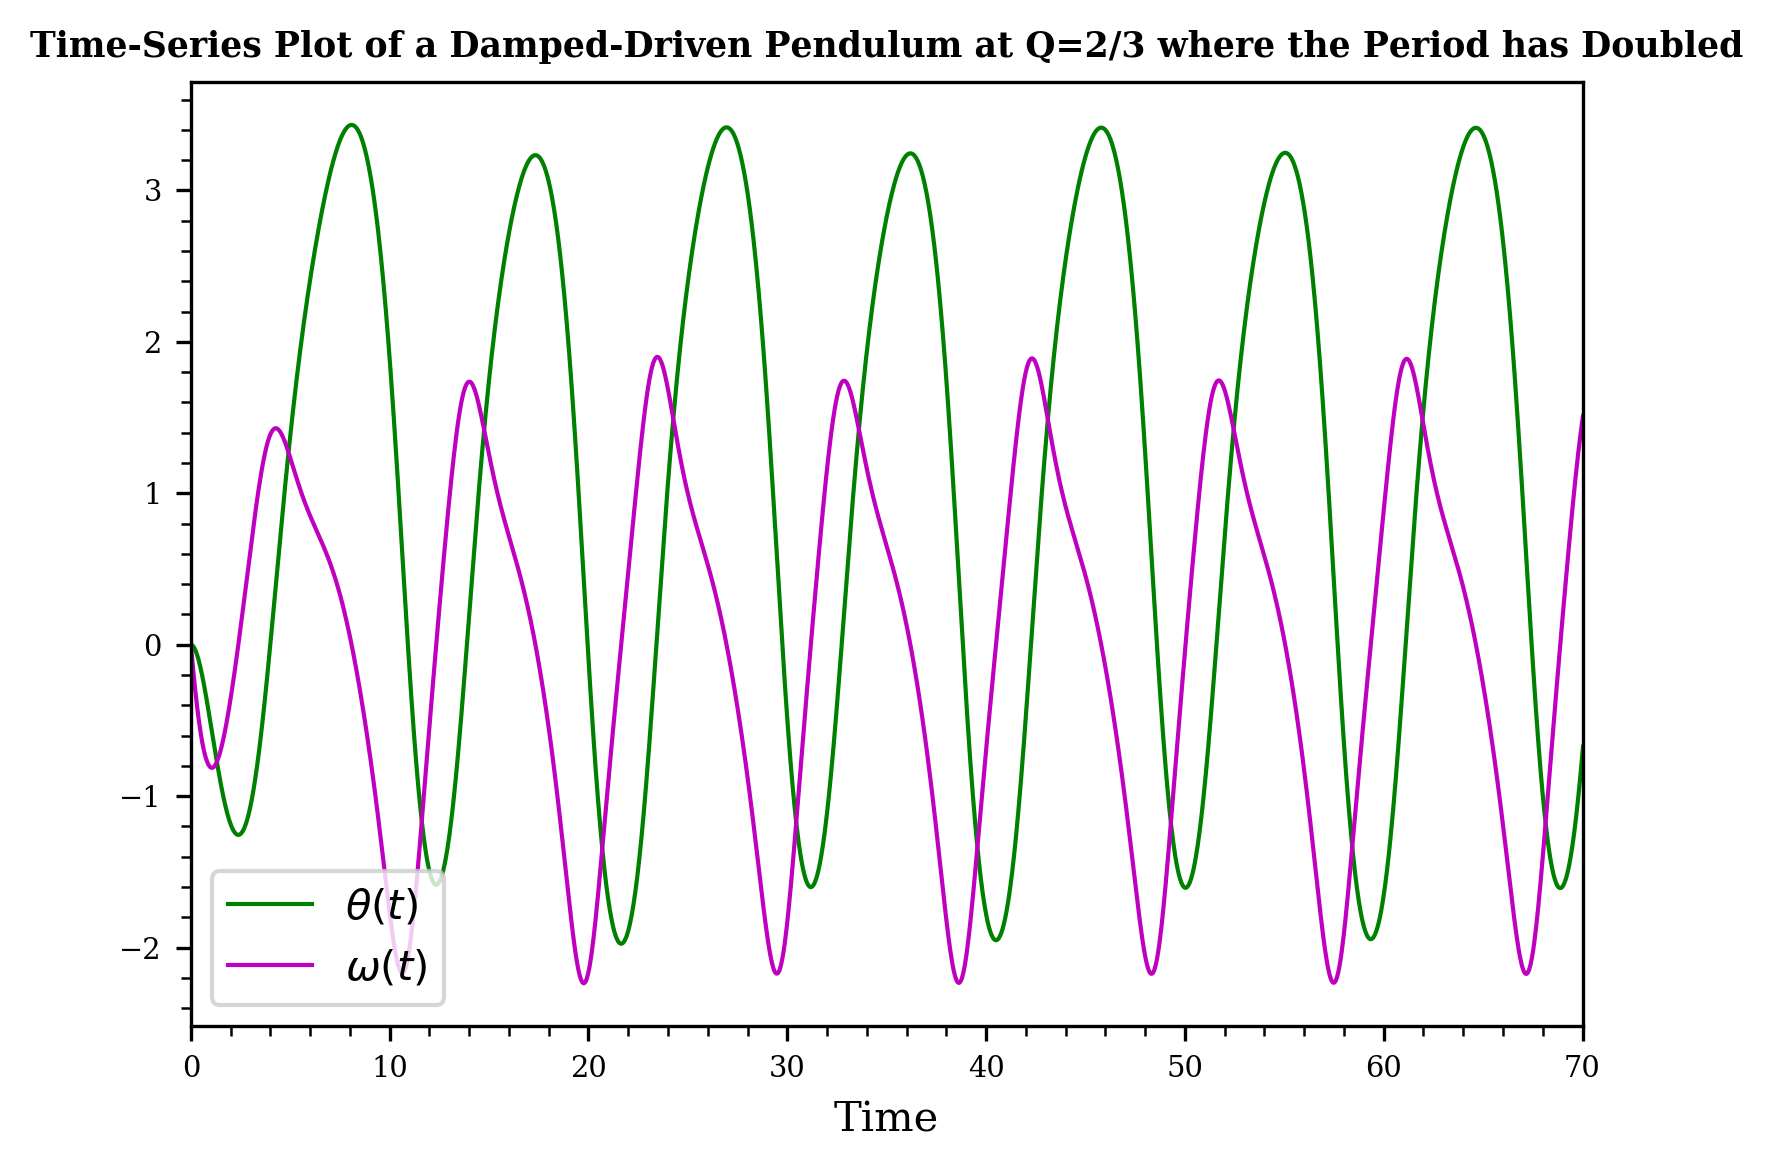

In [93]:
# initial conditions
theta0 = 0
omega0 = 0
t0 = 0
tmax = 50*np.pi
N = int(tmax/h) + 1
#choose a time step
h = (np.pi)/100
# parameters
Q = 1.355 # value of Q that doubles the Period
A = 1.5
omega_d = (2/3)

# solve the ODE
t4,y4_damped = odeSolve(t0,np.array([theta0,omega0]),tmax,h,damped_pendulum_RHS,RK4_step,Q,A,omega_d)

# phase plot
f,a = plt.subplots()
a.plot(y4_damped[:,0],y4_damped[:,1],'b:')
# to plot a point every period
for i in range(N):
    if i!= 0:
        if i%300 == 0:
            a.plot(y4_damped[i,0], y4_damped[i,1],'m.')
a.set_ylabel(r"$\omega(t)$")
a.set_xlabel(r"$\theta(t)$")
a.set_title("Phase Plot of a Damped-Driven Pendulum at Q=2/3 where the Period has Doubled", fontsize='small', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

# time series plot
f,a = plt.subplots()
a.plot(t4, y4_damped[:, 0],'g', lw = 1, label=r"$\theta(t)$")
a.plot(t4, y4_damped[:, 1],'m', lw = 1, label=r"$\omega(t)$")
a.set_xlim(0, 70)
a.legend()
a.set_xlabel("Time")
a.set_title("Time-Series Plot of a Damped-Driven Pendulum at Q=2/3 where the Period has Doubled",fontsize='small', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()

* For Q = 2.1, plot only the Poincare section. Plot points for at least 1000 orbits so that the fractal nature of the section becomes apparent.

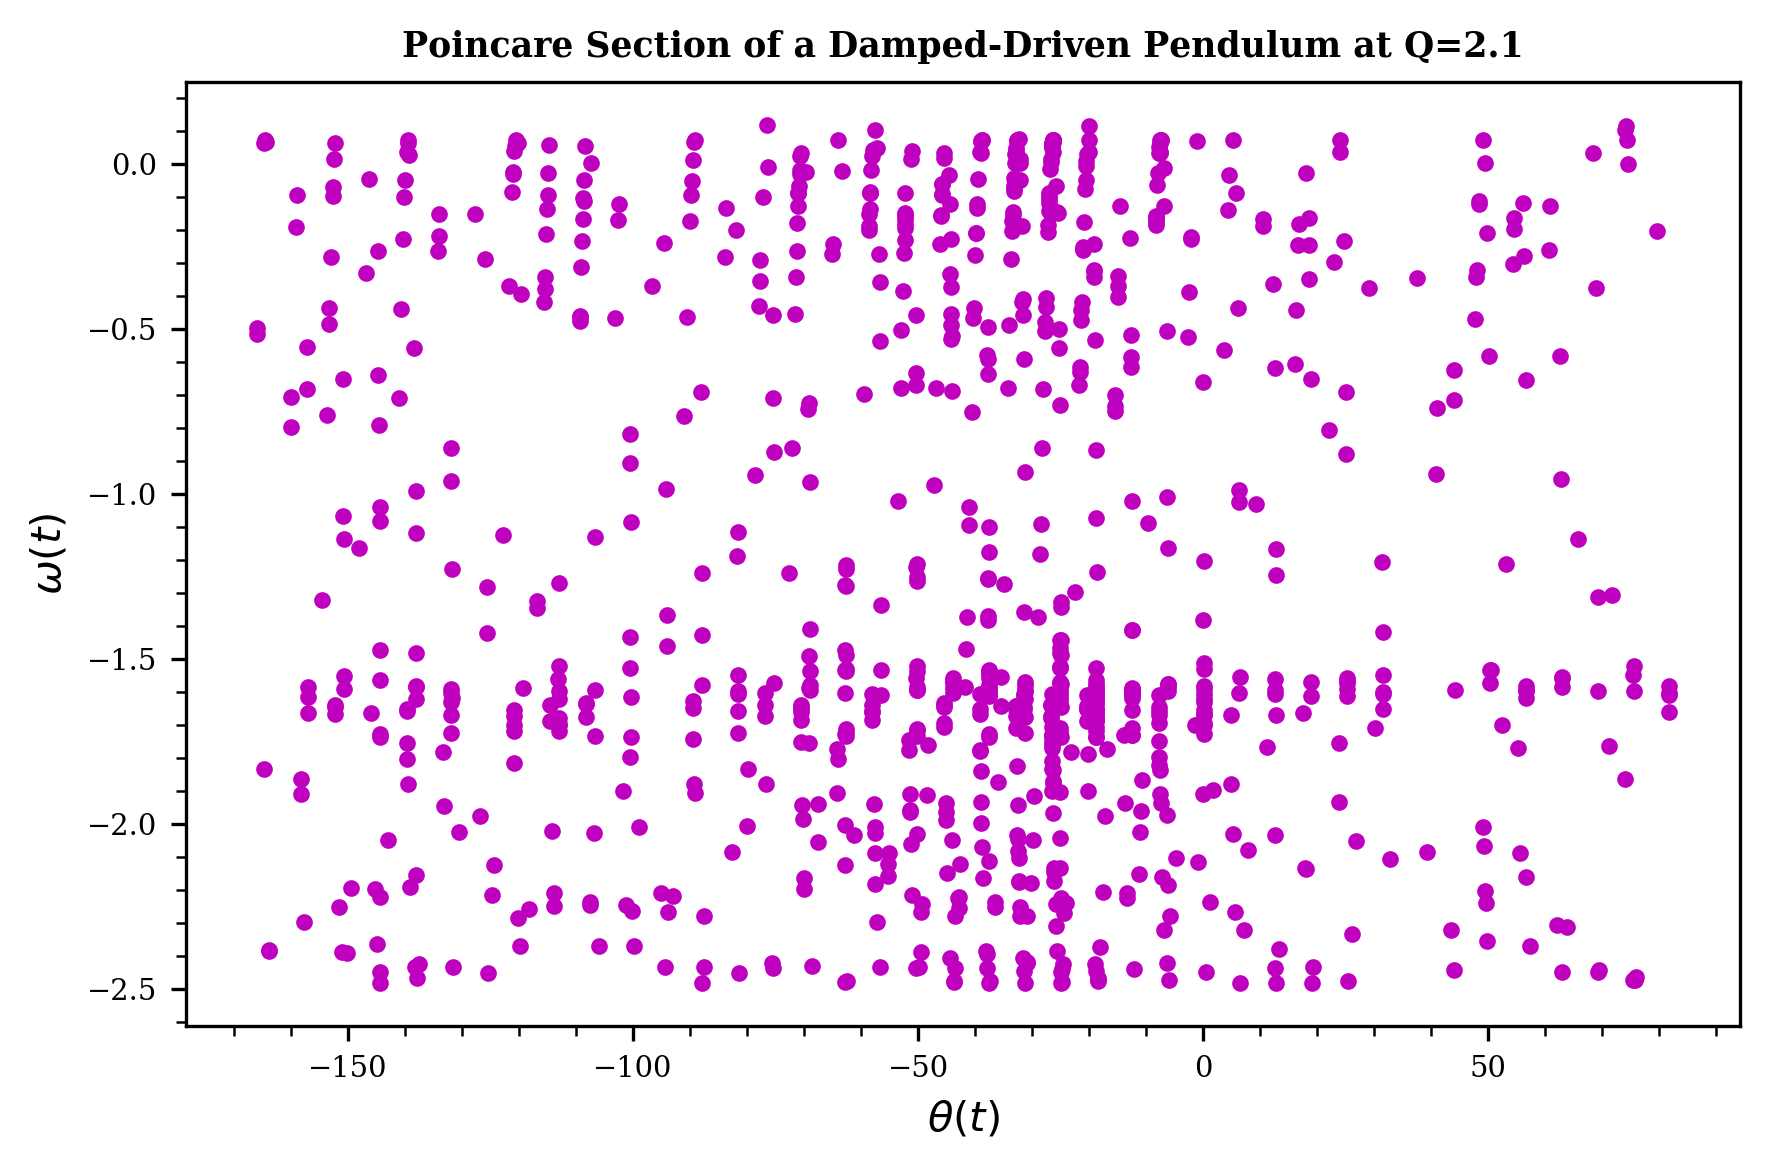

In [96]:
# takes some time to run. LET IT RUN!

# initial conditions
theta0 = 0
omega0 = 1
t0 = 0
tmax = 3000*np.pi
N = int(tmax/h) + 1
#choose a time step
h = (np.pi)/100
# parameters
Q = 2.1 
A = 1.5
omega_d = (2/3)

# solve the ODE
t5,y5_damped = odeSolve(t0,np.array([theta0,omega0]),tmax,h,damped_pendulum_RHS,RK4_step,Q,A,omega_d)

# phase plot
f,a = plt.subplots()
for i in range(N):
    if i!= 0:
        if i%300 == 0:
            a.plot(y5_damped[i,0], y5_damped[i,1],'m.')
a.set_ylabel(r"$\omega(t)$")
a.set_xlabel(r"$\theta(t)$")
a.set_title("Poincare Section of a Damped-Driven Pendulum at Q=2.1", fontsize='small', fontweight='bold')
a.xaxis.set_minor_locator(AutoMinorLocator()) 
a.yaxis.set_minor_locator(AutoMinorLocator())
a.tick_params(which='minor', length=2.5, color='k')
plt.tight_layout()
plt.show()
